In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, IsolationForest


In [2]:
df = pd.read_csv("/content/healthcare_dataset.csv")   # change filename if required
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


TASK 1 — EXPLORATORY DATA ANALYSIS (EDA)

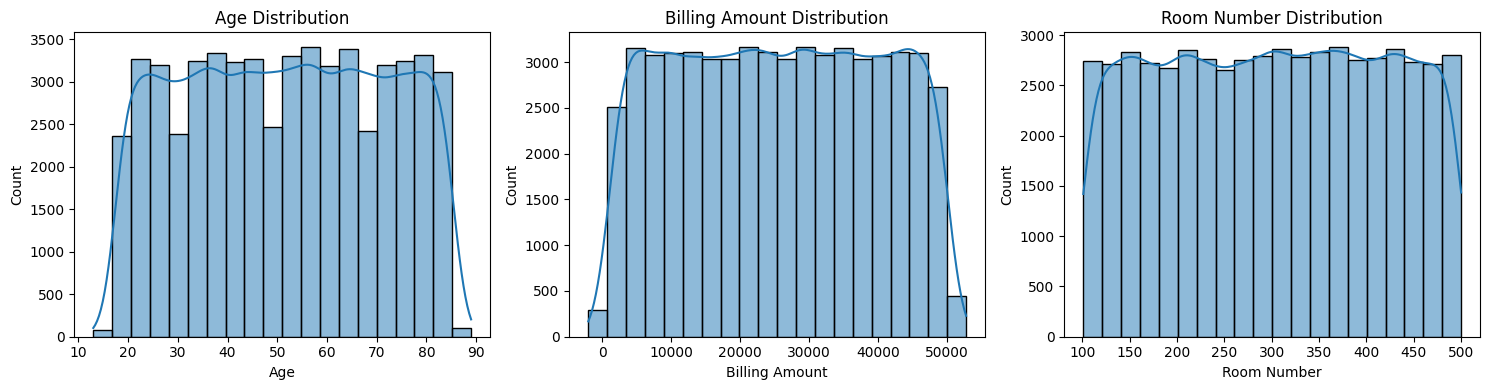

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Billing Amount'], bins=20, kde=True)
plt.title("Billing Amount Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Room Number'], bins=20, kde=True)
plt.title("Room Number Distribution")

plt.tight_layout()
plt.show()

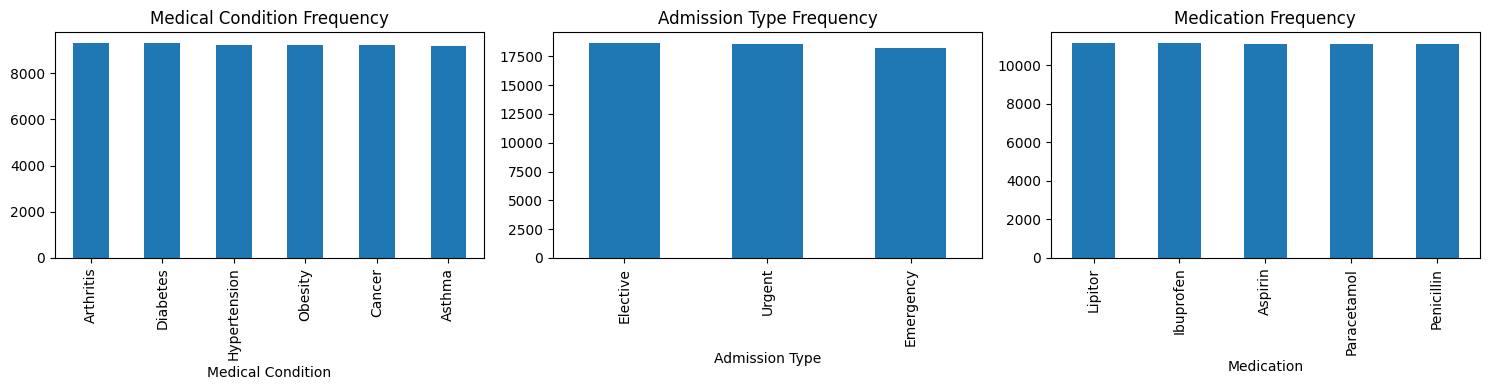

In [5]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
df['Medical Condition'].value_counts().plot(kind='bar')
plt.title("Medical Condition Frequency")

plt.subplot(1,3,2)
df['Admission Type'].value_counts().plot(kind='bar')
plt.title("Admission Type Frequency")

plt.subplot(1,3,3)
df['Medication'].value_counts().plot(kind='bar')
plt.title("Medication Frequency")

plt.tight_layout()
plt.show()


TASK 2 — SUPERVISED LEARNING

In [9]:
df2 = df.copy()

# Convert date columns to numerical representation (Unix timestamp)
df2['Date of Admission'] = pd.to_datetime(df2['Date of Admission']).astype(int) / 10**9
df2['Discharge Date'] = pd.to_datetime(df2['Discharge Date']).astype(int) / 10**9

label_cols = ['Name','Gender','Blood Type','Medical Condition','Doctor','Hospital',
              'Insurance Provider','Admission Type','Medication','Test Results']

encoder = LabelEncoder()

for col in label_cols:
    df2[col] = encoder.fit_transform(df2[col].astype(str))

In [10]:
X = df2.drop('Test Results', axis=1)
y = df2['Test Results']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=20,     # fewer trees = 80% faster
    max_depth=10,        # shallow trees = fast
    n_jobs=-1            # use all CPU cores
)
model.fit(X_train, y_train)

pred = model.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.3625945945945946

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.38      0.38      4714
           1       0.35      0.37      0.36      4509
           2       0.36      0.33      0.35      4652

    accuracy                           0.36     13875
   macro avg       0.36      0.36      0.36     13875
weighted avg       0.36      0.36      0.36     13875



In [13]:
result_df = pd.DataFrame({"Actual": y_test, "Predicted": pred})
print(result_df.head(10))


       Actual  Predicted
31641       1          0
9246        0          0
1583        1          2
36506       0          1
11259       1          1
8972        0          1
36078       1          1
42659       0          0
6545        1          1
35448       2          2


TASK 3 — UNSUPERVISED LEARNING

In [14]:
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso.fit_predict(df[['Billing Amount']])


In [15]:
anomalies = df[df['Anomaly'] == -1]
normal = df[df['Anomaly'] == 1]

print("Anomaly Count:", len(anomalies))
anomalies.head()


Anomaly Count: 2773


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Anomaly
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal,-1
20,tIMOTHY burNs,67,Female,A-,Asthma,2023-06-28,Krista Smith,Jones LLC,Blue Cross,42.514589,115,Elective,2023-07-02,Aspirin,Normal,-1
40,chRiSTOPHer LEe,74,Female,B-,Hypertension,2021-09-15,William Reynolds,PLC Young,Cigna,49943.278499,478,Emergency,2021-10-05,Lipitor,Normal,-1
67,jOhN hARTmAN,27,Male,B-,Hypertension,2023-01-07,Jack Jackson,Bullock-Ramsey,Cigna,49402.298373,263,Elective,2023-01-27,Lipitor,Inconclusive,-1
85,pAtriCIa MEdinA,80,Male,AB+,Cancer,2022-07-07,Miguel Parker,LLC Dixon,UnitedHealthcare,1586.476601,395,Emergency,2022-07-23,Ibuprofen,Normal,-1


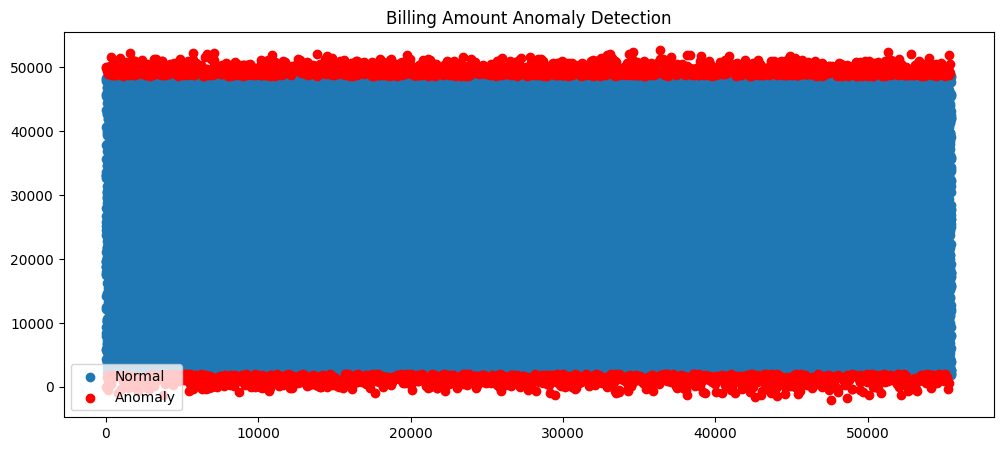

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(normal.index, normal['Billing Amount'], label="Normal")
plt.scatter(anomalies.index, anomalies['Billing Amount'], color='red', label="Anomaly")
plt.title("Billing Amount Anomaly Detection")
plt.legend()
plt.show()


In [17]:
print("Interpretation: These anomalies represent unusually high or low billing amounts,\npossibly rare expensive cases, incorrect entries, or special treatments.")


Interpretation: These anomalies represent unusually high or low billing amounts,
possibly rare expensive cases, incorrect entries, or special treatments.


TASK 4 — AI TASK

In [18]:
def doctor_recommendation(age, condition, medication, result):
    if result == "Normal":
        advice = "Patient is stable. Continue prescribed medication."
    elif result == "Abnormal":
        advice = "Immediate medical review required. Schedule further tests."
    elif result == "Inconclusive":
        advice = "Results unclear. Recommend repeat testing within 48 hours."
    else:
        advice = "No valid test result."

    return f"""
Doctor Recommendation:
• Age: {age}
• Condition: {condition}
• Medication: {medication}
• Test Result: {result}

Advice: {advice}
"""


In [19]:
sample = df.iloc[0]

print(
    doctor_recommendation(
        sample['Age'],
        sample['Medical Condition'],
        sample['Medication'],
        sample['Test Results']
    )
)



Doctor Recommendation:
• Age: 30
• Condition: Cancer
• Medication: Paracetamol
• Test Result: Normal

Advice: Patient is stable. Continue prescribed medication.

